In [9]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [10]:
### 1) Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load CSV and ignore completely empty rows
df = pd.read_csv(
    #but this path has to be changed when it runs in different folder
    '/home/halefoam/a4s/a4s-eval/tests/data/measures/accuracy.csv',
    header=None,
    usecols=[0,1,2],  # only metric, value, timestamp
    names=['metric','value','timestamp'],
    engine='python'
).dropna(how='all')  # drop rows that are completely empty

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Optional: remove rows where value or timestamp is missing
df = df.dropna(subset=['value','timestamp'])

# Preview data
print(f"Total rows loaded: {len(df)}")
df.head()


Total rows loaded: 21


,metric,value,timestamp
0,accuracy,0.7145,2025-12-11 20:41:29.551521
1,accuracy,0.7400,2025-12-11 20:41:29.746584
2,accuracy,0.7220,2025-12-11 20:41:29.829134
3,accuracy,0.7080,2025-12-11 20:41:29.843359
4,accuracy,0.7080,2025-12-11 20:41:29.857571


In [12]:
df.info()
df['value'].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   metric     21 non-null     object        
 1   value      21 non-null     float64       
 2   timestamp  21 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 636.0+ bytes


count    21.000000
mean      0.714500
std       0.019544
min       0.676000
25%       0.706000
50%       0.712000
75%       0.722000
max       0.754000
Name: value, dtype: float64

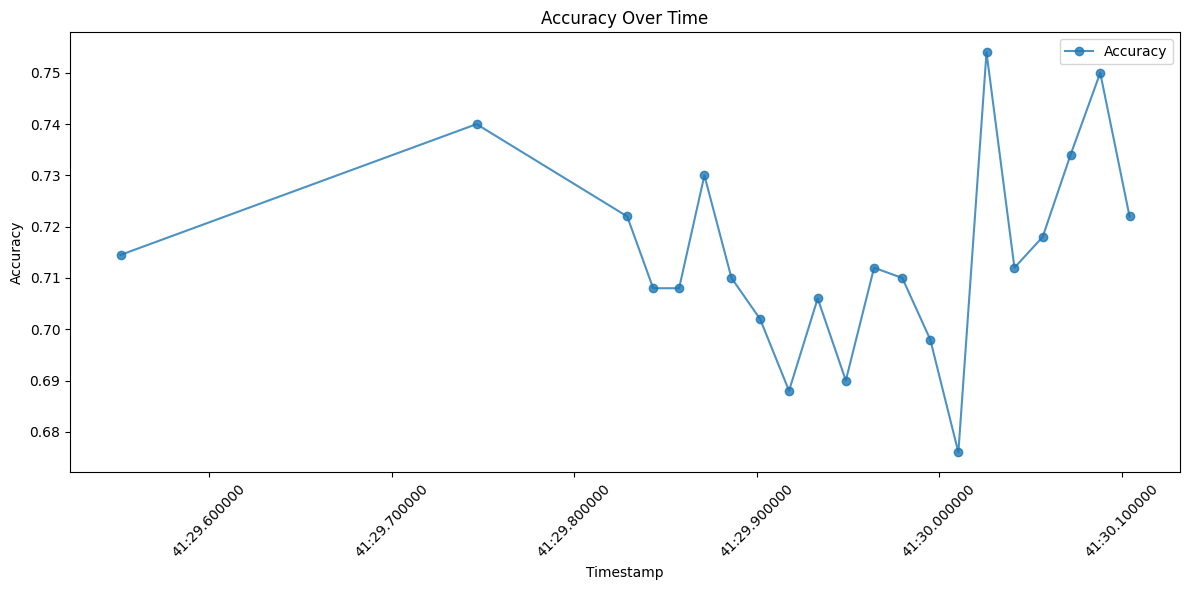

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['value'], 'o-', label='Accuracy', alpha=0.8)
plt.title('Accuracy Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
